In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd
from joblib import dump, load
import seaborn as sbs
sbs.reset_orig()

%autosave 0 

Autosave disabled


In [6]:


class HMM (object):
             def __init__(self,A,B,PI):
                 self.A=A
                 self.B=B
                 self.PI=PI   
def viterbi(obs,Modelo1,PI):
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)
def cuantizar_xy(xy, cc):
    xycuant=cc
    out=np.power(xycuant-xy,2).sum(axis=1).argmin()
    return out
    
def path_to_xy(path,ccxy):
    estimated= pd.DataFrame(path.astype(int).T)
    estimated.columns=[['Path_vit']]
    estimated['xcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,0])
    estimated['ycuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,1])                                
    return (estimated)
def quantized(xyth,ccxyth):
    xythcuant=np.argmin(np.linalg.norm(xyth-ccxyth,axis=1))
    x,y=ccxyth[xythcuant,:2]
    return ((x,y),(xythcuant))



In [7]:
def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


class node(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
        
class grafo (object):
             def __init__(self,nodos,conec):
                 self.nodos=nodos
                 self.conec=conec        

def dijkstra(nodoinicial,nodofinal,graphe):
    

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


In [8]:
ccxyth,ccvk=np.load('ccxyth.npy'),np.load('ccvk.npy')
A,B,PI = np.load('A.npy'),np.load('B.npy'),np.load('PI.npy')
Modelo= HMM(A,B,PI)


In [9]:

data=pd.read_csv('RealROBOT/lecturasconodometria-noisy-a.txt')
#data=data.iloc[:40,:]

cols=['x','y','theta','y_noise','x_noise','theta_noise']
n_reads=data.shape[1]-6
etiquetas=[]
for i in range (n_reads):
    etiquetas.append('R'+str(i))

        
for lab in cols:
    etiquetas.append(lab)


data.columns=etiquetas

"""if (only_nice!=True):
    print("NOT ONLY NICE")
    data2=pd.read_csv('lecturasconodometria.txt')
    data2.columns=etiquetas
    data3= pd.concat((data,data2))
    data=data3

"""



####
#index = data[data.y<-1].index
#data=data.drop(index)



#####

xyth=data[['x','y','theta']]

lecs=data.iloc[:,0:n_reads]
lecs=pd.DataFrame(np.clip(lecs.values,0,3))
data.y_noise=data.y_noise*-1

lecs.describe()


,0,1,2,3,4,5,6,7,8,9,...,953,954,955,956,957,958,959,960,961,962
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,1.743439,1.744909,1.754330,1.757133,1.748436,1.757432,1.765754,1.765348,1.780917,1.792958,...,2.154606,2.104496,2.087000,2.073973,2.067409,2.052140,2.047485,2.034754,2.019341,2.020114
std,1.017095,1.016295,1.016774,1.020715,1.024684,1.021947,1.020083,1.017688,1.012653,1.000869,...,0.712857,0.791964,0.821966,0.824994,0.824693,0.848076,0.862156,0.854418,0.860263,0.855498
min,0.194000,0.340000,0.535000,0.526000,0.415000,0.415000,0.541000,0.541000,0.553000,0.555000,...,0.641000,0.626000,0.598000,0.590000,0.595000,0.547000,0.538000,0.541000,0.534000,0.519000
25%,0.606750,0.602750,0.603000,0.604750,0.605000,0.607750,0.619000,0.633500,0.650000,0.660000,...,1.574750,1.576750,1.587250,1.588000,1.581750,1.584500,1.577250,1.578750,1.577750,1.581500
50%,2.076000,2.090500,2.073500,2.088500,2.110500,2.100000,2.107500,2.104000,2.120000,2.117500,...,2.124500,2.114000,2.103500,2.106500,2.067500,2.086500,2.065000,2.052500,2.057500,2.052500
75%,2.752000,2.768250,2.866500,2.807000,2.845000,2.851250,2.863250,2.852500,2.843500,2.837750,...,2.946250,2.968500,2.989250,2.945000,2.939500,2.939250,2.964000,2.926500,2.902000,2.875000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [10]:

from sklearn.cluster import FeatureAgglomeration
F_agg= FeatureAgglomeration(n_clusters=15).fit(lecs)

from sklearn.decomposition import PCA, KernelPCA
pca =PCA(n_components=15)
pca.fit(lecs)

lecs_pca=pd.DataFrame(pca.transform(lecs))

lecs_fag=pd.DataFrame(F_agg.transform(lecs))
lecs_fag.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,2.081851,1.695160,1.730792,1.797311,1.831571,1.660834,1.612716,1.983686,1.830175,2.127471,1.672227,1.796554,1.854907,1.769688,1.550606
std,0.556152,0.696789,0.712186,0.731350,0.759773,0.759116,0.706647,0.650762,0.791435,0.605351,0.806030,0.804905,0.686119,0.733058,0.765902
min,0.730800,0.463234,0.562775,0.515330,0.574625,0.575804,0.493523,0.656517,0.612694,0.688566,0.460067,0.606153,0.549667,0.603388,0.542245
25%,1.687534,1.197186,1.105034,0.967011,0.981031,0.970103,0.868246,1.454108,0.935684,1.684599,0.774396,0.957856,1.329698,1.094372,0.786786
50%,2.115250,1.749963,1.635437,1.962819,1.951667,1.591616,1.648846,1.890948,1.923898,2.119538,1.905700,1.796508,1.775979,1.619265,1.465776
75%,2.556350,2.274436,2.379247,2.396843,2.518163,2.289518,2.110369,2.594168,2.523597,2.749915,2.275567,2.603195,2.478479,2.400597,2.173985
max,2.950050,2.882564,3.000000,2.936187,2.992583,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [11]:
tx= data.x.iloc[0]-data.x_noise[0]
ty= data.y.iloc[0]-data.y_noise[0]
tx,ty

(5.291028118938128, 2.215231150658544)

No handles with labels found to put in legend.


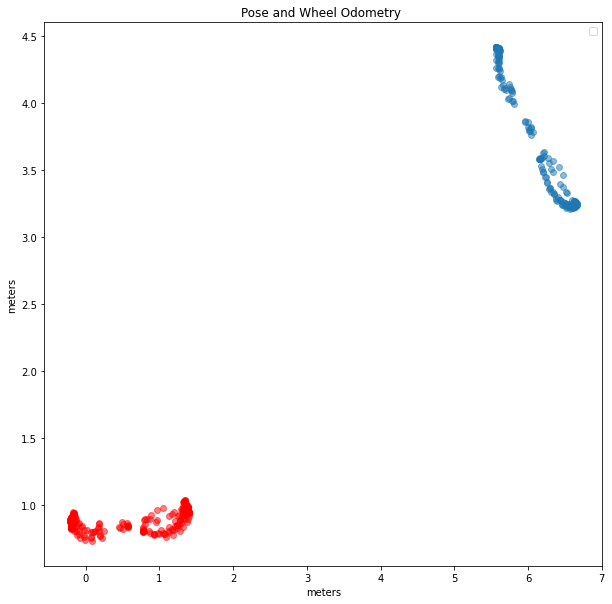

In [12]:
dataorig=data

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

ax1.set_title( "Pose and Wheel Odometry ")
ax1.set_ylabel('meters')
ax1.set_xlabel('meters')
ax1.scatter(x=data.x_noise ,y=data.y_noise,alpha=.5 ,c='r' )
plt.legend()
ax1.scatter(x=data.x,y=data.y, alpha=.5)

In [13]:
rot_ang=-1.57/2
R= np.ones((2,2))
R[0,0]= np.cos(rot_ang)
R[0,1]= -np.sin(rot_ang)
R[1,0]= np.sin(rot_ang)
R[1,1]= np.cos(rot_ang)
rotated=[]
for xy in data[['x_noise','y_noise']].values:
    xy_rotated=np.matmul(R,xy)
    rotated.append(xy_rotated)
rotated=np.asarray(rotated)
data['x_rot']=rotated[:,0]
data['y_rot']=rotated[:,1]
tx=data.x.iloc[-1]-data.x_rot.iloc[-1]
ty=data.y.iloc[-1]-data.y_rot.iloc[-1]
tx,ty
data.x_rot=data.x_rot+tx
data.y_rot=data.y_rot+ty


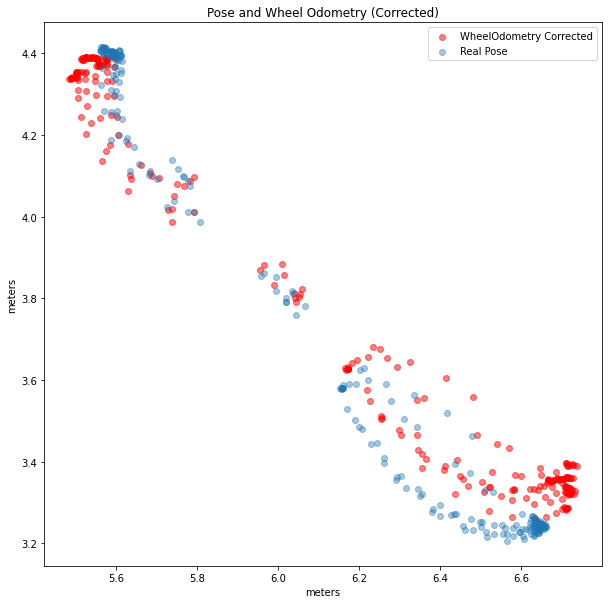

In [14]:


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.set_title( "Pose and Wheel Odometry (Corrected)")
ax1.set_ylabel('meters')
ax1.set_xlabel('meters')
ax1.scatter(x=data.x_rot,y=data.y_rot ,c='r', label='WheelOdometry Corrected', alpha=.5 )

ax1.scatter(x=data.x,y=data.y, label='Real Pose',alpha=.4 )
plt.legend()

In [15]:
delta_odom= np.linalg.norm(data[['x','y']].values-data[['x_rot','y_rot']].values,axis=1)
data['delta_odom'] =delta_odom

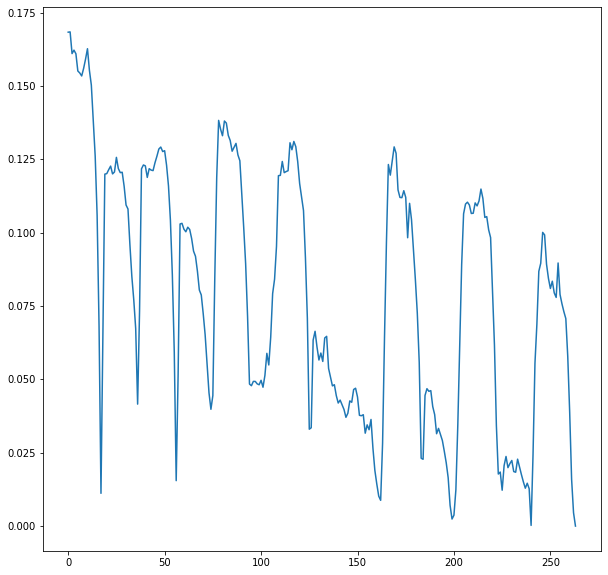

In [16]:


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.plot(data.delta_odom)

In [17]:
data.delta_odom.describe()

count    264.000000
mean       0.079678
std        0.042792
min        0.000000
25%        0.042872
50%        0.082217
75%        0.118981
max        0.168426
Name: delta_odom, dtype: float64

In [18]:
x_1,y_1,th_1= 0,0,0
delta_mov=[]
delta_th=[]
for x,y,th in zip (data.x,data.y,data.theta):
    
    
    delta_mov.append(np.array((x,y))-np.array((x_1,y_1)  ))
    if (th-th_1)> 6:
        delta_th.append(th-th_1-(2*3.1416))
    if (th-th_1)<- 6:
        delta_th.append(th-th_1+(2*3.1416))
    
    if ((th-th_1)>- 6 and (th-th_1)< 6  ):
        delta_th.append(th-th_1)
    x_1,y_1,th_1=x,y,th


In [19]:
x_1,y_1,th_1= 0,0,0
delta_mov_rot=[]
delta_th_rot=[]
for x,y,th in zip (data.x_rot,data.y_rot,data.theta_noise):
    
    
    delta_mov_rot.append(np.array((x,y))-np.array((x_1,y_1)  ))
    if (th-th_1)> 6:
        delta_th_rot.append(th-th_1-(2*3.1416))
    if (th-th_1)<- 6:
        delta_th_rot.append(th-th_1+(2*3.1416))
    
    if ((th-th_1)>- 6 and (th-th_1)< 6  ):
        delta_th_rot.append(th-th_1)
    x_1,y_1,th_1=x,y,th


In [20]:
delta_th[0],delta_th_rot[0]=0,0

In [21]:
DELTA_TH=pd.DataFrame(np.array(delta_th)-np.array(delta_th_rot))
DELTA_TH.describe()

,0
count,264.000000
mean,0.000633
std,0.017074
min,-0.045088
25%,-0.010764
50%,0.000291
75%,0.012431
max,0.054492


$$ThetaNoise ,   N(\mu ,\sigma) $$

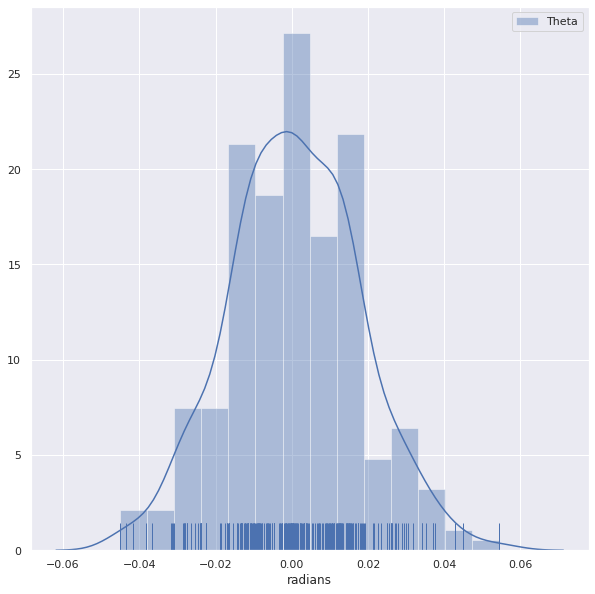

In [39]:
import seaborn as sns
sns.set()
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)

sns.distplot(DELTA_TH, label='Theta')

ax1.set_xlabel('radians')
plt.legend()
plt.legend()

In [23]:
DELTA_MOV=pd.DataFrame(np.array(delta_mov)-np.array(delta_mov_rot))
DELTA_MOV.describe()

,0,1
count,264.000000,264.000000
mean,0.000000,0.000000
std,0.014286,0.014150
min,-0.095343,-0.138729
25%,-0.004459,-0.002499
50%,-0.000867,0.000272
75%,0.003233,0.003791
max,0.057336,0.041219


$$XY Noise ,   N(\mu ,\sigma) $$

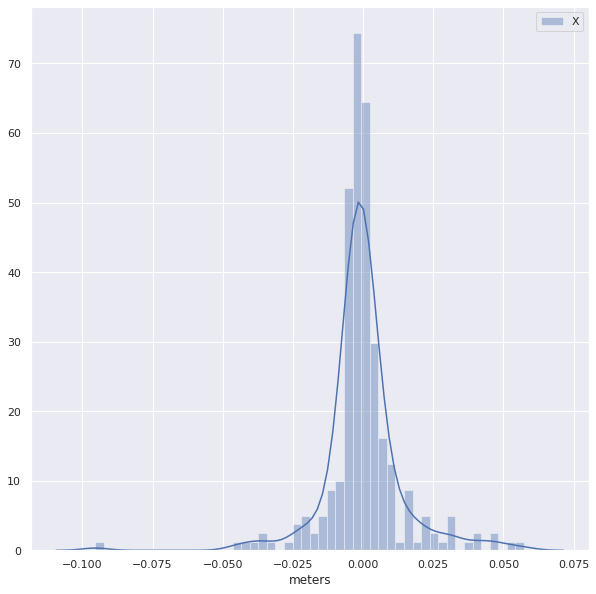

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
sns.distplot(DELTA_MOV[0], label='X')

ax1.set_xlabel('meters')
plt.legend()

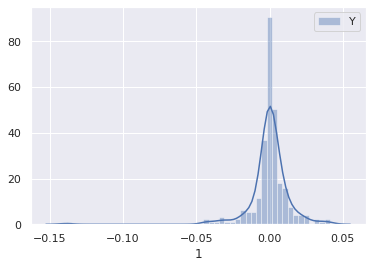

In [25]:
sns.distplot(DELTA_MOV[1], label='Y')
plt.legend()

In [26]:
xyth_od=data[['x_rot','y_rot','theta_noise']]


In [27]:
if True:
    
    K_corpus=128
    N=16
    
    kmedias=MiniBatchKMeans(init='k-means++', n_clusters=K_corpus, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    kmedias.fit(lecs_pca)  ########CHOOSE LECS OR DIM REDUCED LECS
    ccvk=kmedias.cluster_centers_
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=N, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    mbk.fit(xyth)
    ccxyth=mbk.cluster_centers_
aus=[]
aus_odom=[]
auvks=[]
for i,lec,j in zip(xyth.values, lecs_pca.values,xyth_od.values):########CHOOSE LECS OR DIM REDUCED LECS
    _, au= quantized(i , ccxyth)
    _, au_od= quantized(i , ccxyth)
    aus.append(au)
    aus_odom.append(au_od)

    auvk= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()
    auvks.append(auvk)

data['Y']=aus
data['Y_odom']=aus_odom
data['Vk']=auvks


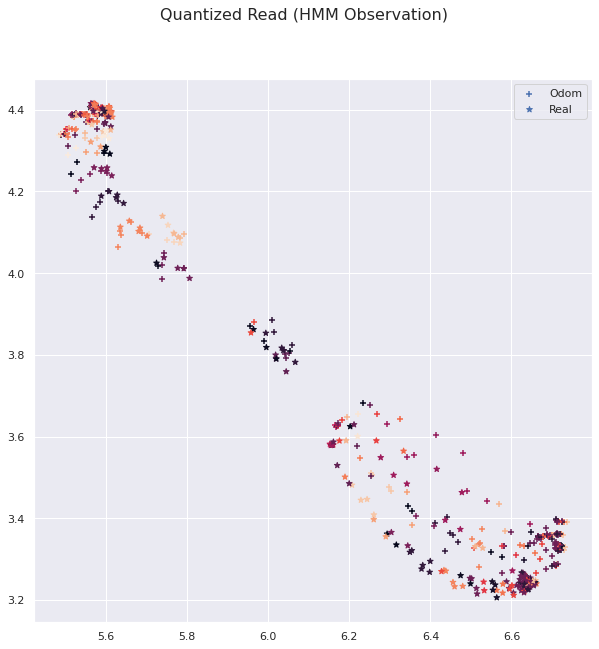

In [28]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Quantized Read (HMM Observation)', fontsize=16)

ax1 = fig.add_subplot(111)

ax1.scatter(x=data.x_rot,y=data.y_rot,marker='+' ,c=data.Vk, label='Odom' )
ax1.scatter(x=data.x,y=data.y ,marker='*', c=data.Vk,label='Real')
ax1.legend()

In [29]:
data.Vk.value_counts()

36     43
17     22
92     12
32     12
108    10
9      10
77     10
94     10
114     8
40      7
50      7
89      7
109     6
34      6
124     6
4       6
24      5
1       5
85      5
102     5
111     5
84      4
13      4
119     4
65      4
15      3
31      3
45      3
126     3
73      3
76      3
82      3
103     2
5       2
79      2
47      2
41      2
125     1
62      1
51      1
86      1
90      1
97      1
101     1
55      1
2       1
22      1
Name: Vk, dtype: int64

<AxesSubplot:>

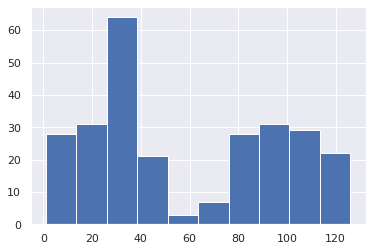

In [30]:
data.Vk.hist()

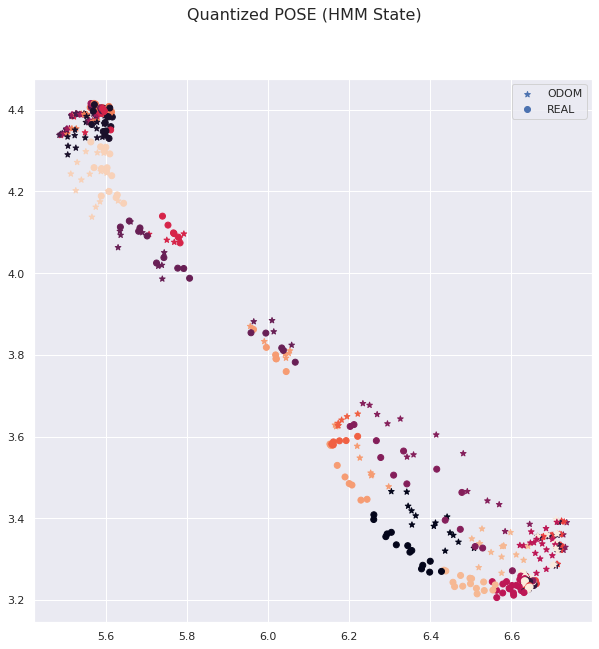

In [31]:


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
fig.suptitle('Quantized POSE (HMM State)', fontsize=16)

ax1.scatter(x=data.x_rot,y=data.y_rot,marker='*' ,c=data.Y_odom  ,label='ODOM')
ax1.scatter(x=data.x,y=data.y , c=data.Y,label='REAL')
ax1.legend()

In [32]:
save=False
est,obs= data.Y.values,data.Vk.values

In [33]:
####BAUM WELCH APPROX###############???!?!?!


N=est.max()+1 
K_corpus= obs.max()+1
TRANS=np.zeros((N,N))
for i in range (N):
    fromTO=[]


    indices=np.asarray(np.where(est==i)).ravel()
   

    for indice in indices:

        if (int(indice)==len(est)-1):
            
            indice=indice-1

        fromTO.append(est[indice+1])
    fromTO.append(0)
    fromTO.append(N-1)
    aux=np.asarray(np.bincount(fromTO    ))
    aux[0]=aux[0]-1
    aux[N-1]=aux[N-1]-1
    
    TRANS[i,:]=aux
TRANS=TRANS/TRANS.sum(axis=1)
#####################################3
EMIS= np.zeros((N,K_corpus))
for Vk in range (K_corpus):

    indices=np.asarray(np.where(obs==Vk)).ravel()
    estconvk= est[indices]

    numestenvk=np.bincount(estconvk)
    if (N-len(numestenvk)>0):
        numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
    EMIS[:,Vk]=(numestenvk/np.bincount(est))

A,B=TRANS,EMIS
PI=np.ones(N)/N
Modelo1=HMM(A,B,PI)


if save:

    #np.linalg.norm(Modelo1.A-Modelo2.A)
    np.save('A.npy',Modelo1.A)
    np.save('B.npy',Modelo1.B)
    np.save('PI.npy',Modelo1.PI)
    print("MODEL SAVED")
else:
    print("MODEL NOT SAVED")
B.shape

MODEL NOT SAVED


(16, 127)

In [34]:
save=False
est,obs= data.Y.values,data.Vk.values

In [35]:
####BAUM WELCH APPROX###############???!?!?!


N=est.max()+1 
K_corpus= obs.max()+1
TRANS=np.zeros((N,N))
for i in range (N):
    fromTO=[]


    indices=np.asarray(np.where(est==i)).ravel()
   

    for indice in indices:

        if (int(indice)==len(est)-1):
            
            indice=indice-1

        fromTO.append(est[indice+1])
    fromTO.append(0)
    fromTO.append(N-1)
    aux=np.asarray(np.bincount(fromTO    ))
    aux[0]=aux[0]-1
    aux[N-1]=aux[N-1]-1
    
    TRANS[i,:]=aux
TRANS=TRANS/TRANS.sum(axis=1)
#####################################3
EMIS= np.zeros((N,K_corpus))
for Vk in range (K_corpus):

    indices=np.asarray(np.where(obs==Vk)).ravel()
    estconvk= est[indices]

    numestenvk=np.bincount(estconvk)
    if (N-len(numestenvk)>0):
        numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
    EMIS[:,Vk]=(numestenvk/np.bincount(est))

A,B=TRANS,EMIS
PI=np.ones(N)/N
Modelo1=HMM(A,B,PI)


if save:

    #np.linalg.norm(Modelo1.A-Modelo2.A)
    np.save('A.npy',Modelo1.A)
    np.save('B.npy',Modelo1.B)
    np.save('PI.npy',Modelo1.PI)
    print("MODEL SAVED")
else:
    print("MODEL NOT SAVED")
B.shape

MODEL NOT SAVED


(16, 127)

In [36]:
def accuracy(yhat,ytrue):
    weights=[.5,.2,.1,.05,.05]
    if len (yhat)>=5:
        yhat=yhat[-5:]
        ytrue=ytrue[-5:]
        accuracy=np.dot((yhat==ytrue),weights)
        return accuracy



In [37]:


buf_vit=10
indice= int(np.random.rand()*(len(obs)-2*buf_vit))
for i in range(1):
    
   
    obs_windowed= obs[indice:indice+buf_vit]
    #obs2_windowed= obs2[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    

    print(indice)
    #PATH from Model 1 KMEANS CC's obs
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI)
    
    ##PATH FROM MODEL 2 WICH NEEDS AFF PORP QUANT OBS
   # path2= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
    yhat=np.zeros(len(path)-1)
  #  yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
      #  yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat))
    #print(accuracy(ytrue,yhat), accuracy(ytrue,yhat2))
    

162
0.4
